In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns



In [3]:
df = pd.read_csv(r"C:\Users\KIIT0001\PycharmProjects\PythonProject\fraud-detection\datasets\card_transdata.csv")

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.shape

(1000000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
df.isnull().sum()


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

feedback: no missing value

In [8]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


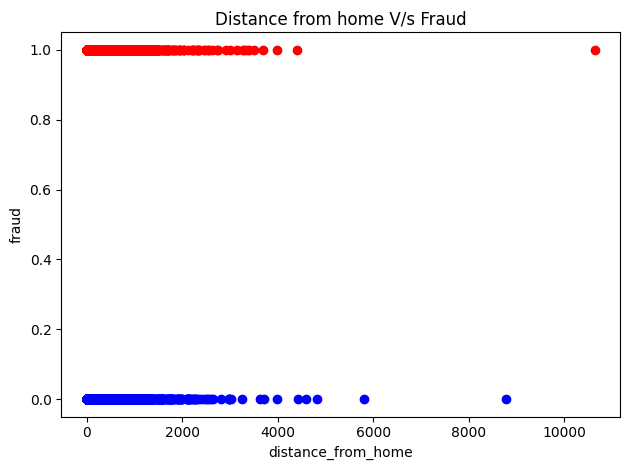

In [34]:
plt.scatter(df[df['fraud'] == 0]['distance_from_home'], df[df['fraud'] == 0]['fraud'], color='blue', label='Not Fraud')
plt.scatter(df[df['fraud'] == 1]['distance_from_home'], df[df['fraud'] == 1]['fraud'], color='red', label='Fraud')
plt.xlabel("distance_from_home")
plt.ylabel("fraud")
plt.title("Distance from home V/s Fraud")
plt.tight_layout()
plt.show()

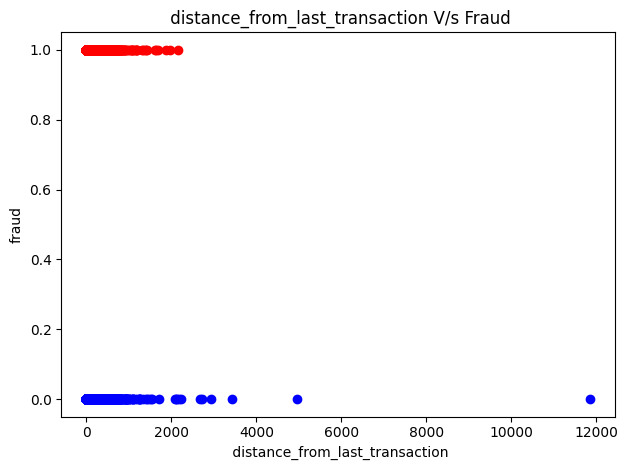

In [29]:
plt.scatter(df[df['fraud'] == 0]['distance_from_last_transaction'], df[df['fraud'] == 0]['fraud'], color='blue', label='Not Fraud')
plt.scatter(df[df['fraud'] == 1]['distance_from_last_transaction'], df[df['fraud'] == 1]['fraud'], color='red', label='Fraud')
plt.xlabel(" distance_from_last_transaction")
plt.ylabel("fraud")
plt.title(" distance_from_last_transaction V/s Fraud")
plt.tight_layout()
plt.show()

remarks : all the fraud transaction was  near to the last transaction


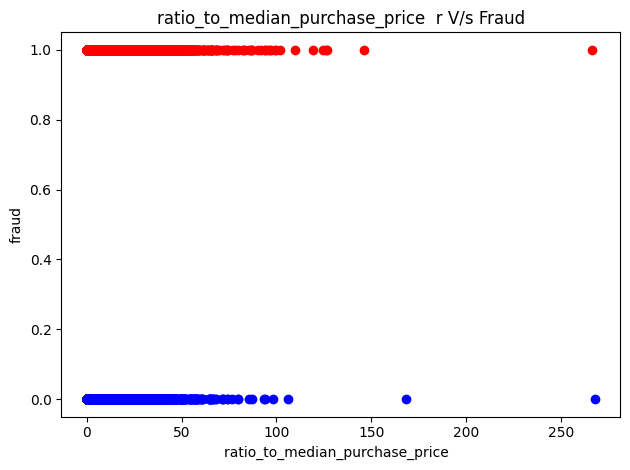

In [36]:
plt.scatter(df[df['fraud'] == 0]['ratio_to_median_purchase_price'], df[df['fraud'] == 0]['fraud'], color='blue', label='Not Fraud')
plt.scatter(df[df['fraud'] == 1]['ratio_to_median_purchase_price'], df[df['fraud'] == 1]['fraud'], color='red', label='Fraud')
plt.xlabel("ratio_to_median_purchase_price  ")
plt.ylabel("fraud")
plt.title("ratio_to_median_purchase_price  r V/s Fraud")
plt.tight_layout()
plt.show()

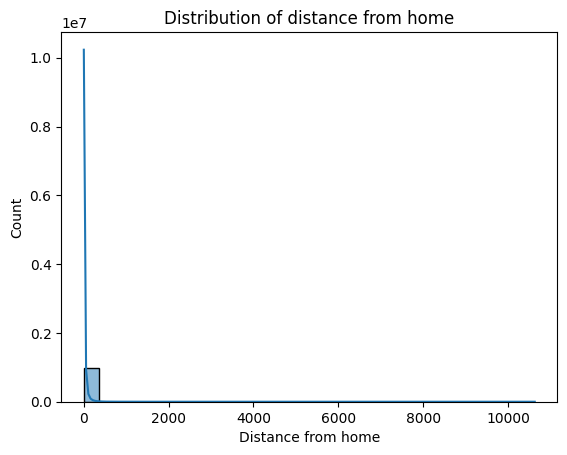

In [62]:
sns.histplot(df['distance_from_home'],bins=30,kde=True)
plt.xlabel("Distance from home")
plt.ylabel("Count")
plt.title("Distribution of distance from home")
plt.show()


In [41]:
X = df.drop('fraud',axis=1)
y = df['fraud']

In [42]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train_updated  =  scaled.fit_transform(X_train)
X_test_updated = scaled.transform(X_test)

In [51]:
X_train_updated

array([[-0.39747325, -0.1274626 , -0.54301009, ..., -0.73424716,
        -0.33465018,  0.73329637],
       [-0.23829072,  0.03720792, -0.54127497, ..., -0.73424716,
         2.98819498,  0.73329637],
       [-0.32714814, -0.10080505, -0.33337051, ..., -0.73424716,
        -0.33465018,  0.73329637],
       ...,
       [-0.09490761, -0.21766392, -0.32511448, ..., -0.73424716,
        -0.33465018, -1.36370509],
       [-0.25853974, -0.21055962, -0.2326803 , ..., -0.73424716,
        -0.33465018,  0.73329637],
       [-0.40256384, -0.10897428, -0.1654201 , ...,  1.36193922,
        -0.33465018, -1.36370509]], shape=(670000, 7))

In [60]:
model = KNeighborsClassifier(n_neighbors=4,n_jobs=-1,)
model.fit(X_train_updated,y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_train_updated),y_train)

0.9991701492537314

In [54]:
accuracy_score(model.predict(X_test_updated),y_test)

0.9984121212121212

In [55]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold CV

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.985125 0.9847   0.984955 0.984755 0.98468 ]
Mean accuracy: 0.984843


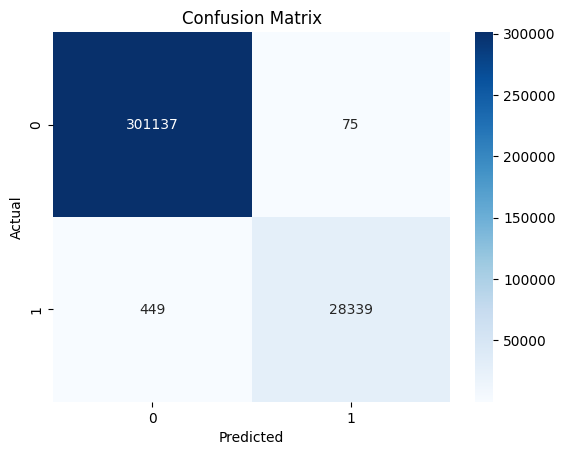

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_updated)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

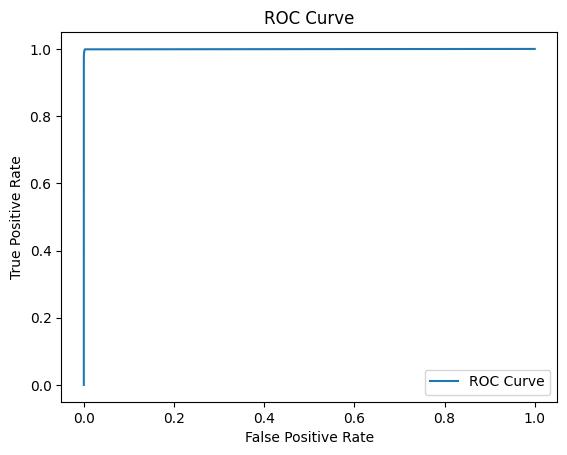

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test_updated)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

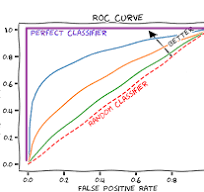

In [64]:
k_range =list(range(1,13))

param_grid = dict(n_neighbors=k_range)



In [69]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid,cv=5,scoring='accuracy',return_train_score=False,n_jobs=-1)
grid.fit(X_train_updated,y_train)

,estimator,KNeighborsCla...n_neighbors=4)
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [70]:
grid.best_score_

np.float64(0.9987014925373134)

In [71]:
grid.best_params_

{'n_neighbors': 3}

In [73]:
model = KNeighborsClassifier(n_neighbors=3,n_jobs=-1,)
model.fit(X_train_updated,y_train)
y_pred = model.predict(X_test_updated)

In [74]:
print(y_pred)

[0. 0. 0. ... 0. 0. 1.]


In [76]:
accuracy_score(y_pred,y_test)

0.9986030303030303